In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,roc_auc_score,roc_curve
from pickle import dump

import warnings
warnings.filterwarnings('ignore')

In [5]:
company = pd.read_csv('Company_Data (1).csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


#### Lets have CompPrice>124 as High Sales and the other as Low Sale

In [9]:
for i in range(len(company['CompPrice'])):
    if company['CompPrice'] [i]>124:
        company['CompPrice'] [i]= 'High'
    else:
         company['CompPrice'] [i] = 'Low'
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,High,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,Low,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,Low,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,Low,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,High,64,3,340,128,Bad,38,13,Yes,No


In [10]:
company2 = company.copy()

In [11]:
le = LabelEncoder()
company2['CompPrice'] = le.fit_transform(company2['CompPrice'])
company2['Urban'] = le.fit_transform(company2['Urban'])
company2['US'] = le.fit_transform(company2['US'])
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,0,73,11,276,120,Bad,42,17,1,1
1,11.22,1,48,16,260,83,Good,65,10,1,1
2,10.06,1,35,10,269,80,Medium,59,12,1,1
3,7.40,1,100,4,466,97,Medium,55,14,1,1
4,4.15,0,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,0,108,17,203,128,Good,33,14,1,1
396,6.14,0,23,3,37,120,Medium,55,11,0,1
397,7.41,0,26,12,368,159,Medium,40,18,1,1
398,5.94,1,79,7,284,95,Bad,50,12,1,1


In [12]:
company3 = company2.copy()
company3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,0,73,11,276,120,Bad,42,17,1,1
1,11.22,1,48,16,260,83,Good,65,10,1,1
2,10.06,1,35,10,269,80,Medium,59,12,1,1
3,7.40,1,100,4,466,97,Medium,55,14,1,1
4,4.15,0,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,0,108,17,203,128,Good,33,14,1,1
396,6.14,0,23,3,37,120,Medium,55,11,0,1
397,7.41,0,26,12,368,159,Medium,40,18,1,1
398,5.94,1,79,7,284,95,Bad,50,12,1,1


In [13]:
company3 = pd.get_dummies(data = company2, columns=['ShelveLoc'])
company3

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,0,73,11,276,120,42,17,1,1,1,0,0
1,11.22,1,48,16,260,83,65,10,1,1,0,1,0
2,10.06,1,35,10,269,80,59,12,1,1,0,0,1
3,7.40,1,100,4,466,97,55,14,1,1,0,0,1
4,4.15,0,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,0,108,17,203,128,33,14,1,1,0,1,0
396,6.14,0,23,3,37,120,55,11,0,1,0,0,1
397,7.41,0,26,12,368,159,40,18,1,1,0,0,1
398,5.94,1,79,7,284,95,50,12,1,1,1,0,0


In [14]:
company3.dtypes

Sales               float64
CompPrice             int32
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
Urban                 int32
US                    int32
ShelveLoc_Bad         uint8
ShelveLoc_Good        uint8
ShelveLoc_Medium      uint8
dtype: object

### Model Building

In [15]:
x = company3.drop(labels='CompPrice',axis=1)
y = company3[['CompPrice']]
x

,Sales,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,73,11,276,120,42,17,1,1,1,0,0
1,11.22,48,16,260,83,65,10,1,1,0,1,0
2,10.06,35,10,269,80,59,12,1,1,0,0,1
3,7.40,100,4,466,97,55,14,1,1,0,0,1
4,4.15,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,108,17,203,128,33,14,1,1,0,1,0
396,6.14,23,3,37,120,55,11,0,1,0,0,1
397,7.41,26,12,368,159,40,18,1,1,0,0,1
398,5.94,79,7,284,95,50,12,1,1,1,0,0


In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12345)

In [17]:
X_train.shape, X_test.shape

((320, 12), (80, 12))

In [18]:
y_train.shape, y_test.shape

((320, 1), (80, 1))

In [19]:
X_train

,Sales,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
319,6.97,45,19,459,129,57,11,0,1,0,0,1
163,5.68,64,0,40,106,39,17,0,0,1,0,0
148,7.56,119,0,384,97,72,14,0,1,0,0,1
239,3.89,105,0,149,118,62,16,1,1,1,0,0
359,3.13,62,11,396,130,66,14,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34,2.67,54,0,406,128,42,17,1,1,0,0,1
357,13.36,73,3,276,72,34,15,1,1,0,0,1
382,4.95,28,19,315,121,66,14,1,1,0,0,1
129,4.47,120,7,279,147,40,10,0,1,1,0,0


### Model Training

In [23]:
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=9)#from gridsearch optimum values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [24]:
grid_search = GridSearchCV(estimator = rf_classifier, 
                           param_grid = {'criterion' : ['gini' , 'entropy'],
                                         'max_depth' : [4,5,6,7,8,9,10,11,12,13] }, 
                           cv = 5)
grid_search.fit(x,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=9),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

In [25]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [26]:
grid_search.best_score_

0.7375

### Training Data

In [29]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

#### Test Data

In [31]:
y_pred_test = rf_classifier.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

#### Training Accuracy

In [32]:
accuracy_score(y_train,y_pred_train)

1.0

In [33]:
print(confusion_matrix(y_train,y_pred_train))

[[163   0]
 [  0 157]]


In [34]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       157

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



auc accuracy: 1.0


Text(0, 0.5, 'True Positive Rate')

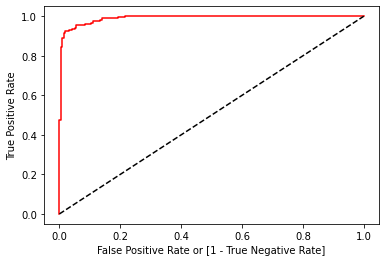

In [36]:
fpr, tpr, thresholds = roc_curve(y, rf_classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print('auc accuracy:',auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### Test Accuracy

In [37]:
accuracy_score(y_test,y_pred_test)

0.75

In [38]:
print(confusion_matrix(y_test,y_pred_test))

[[32  6]
 [14 28]]


#### Model Deployment

In [39]:
dump(rf_classifier,open('Company_rf_model.pkl','wb'))
from pickle import load
loaded_pkl_file = load(open('Company_rf_model.pkl','rb'))
predicted_answers = loaded_pkl_file.predict(X_test)
accuracy_score(y_test,predicted_answers)

0.75